In [1]:
# import all the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')


In [2]:
# dowanload the data from yfinance library
start_date ='2017-01-01'
end_date ='2023-08-31'
data = yf.download('SBIN.NS', start =start_date, end=end_date)
data.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,252.500000,253.649994,242.600006,243.600006,231.042770,25988990
2017-01-03,244.000000,246.399994,241.100006,244.899994,232.275757,15963085
2017-01-04,245.800003,246.399994,242.199997,242.899994,230.378830,11225978


In [3]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()  # data are show after 20 rows beacuse 20 rows are used to calculate sma
short_rolling.head(3)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Calculating the long-window simple moving average 
long_rolling = data.rolling(window=100).mean()
long_rolling.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,576.398002,580.694501,571.4885,576.065999,571.982057,18247064.67
2023-08-29,576.887002,581.172501,571.9860,576.546998,572.563467,18236403.73
2023-08-30,577.384002,581.673502,572.4565,576.990999,573.107162,18253469.88


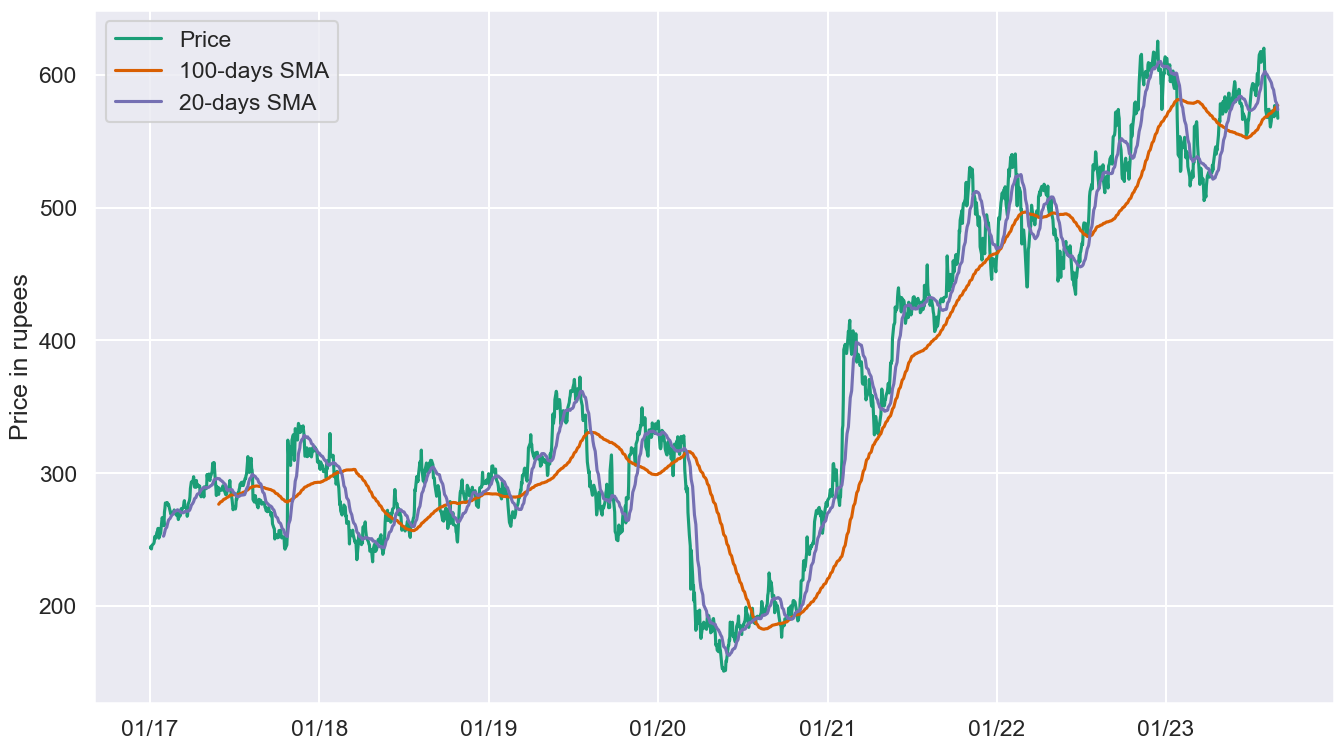

In [5]:
# PLOT THE DATA 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price') #  CLOSING PRICE OF SBIN PLOT

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '100-days SMA') # 100 DAYS SMA

ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA') # 20 DAYS SMA

ax.legend(loc='best')
ax.set_ylabel('Price in rupees')
ax.xaxis.set_major_formatter(my_year_month_fmt)

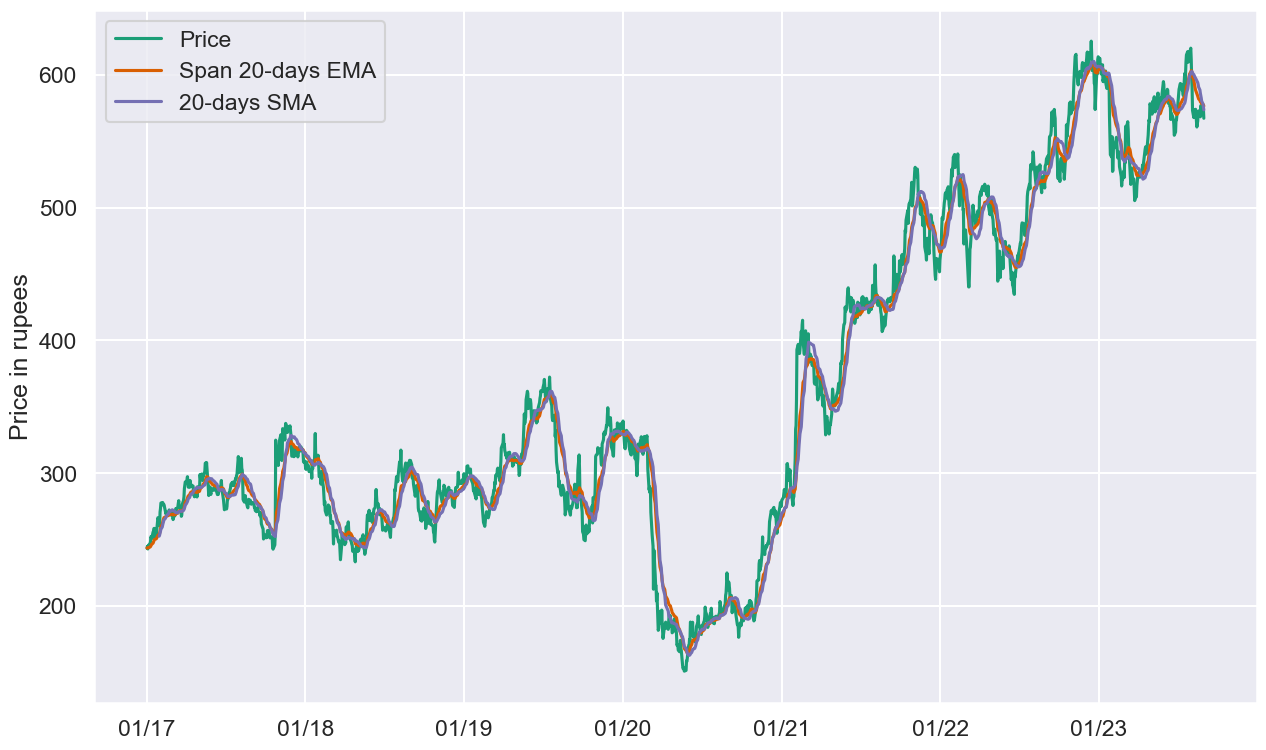

In [6]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.

ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in rupees')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [7]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()    

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-24,-2.138973,-2.238680,0.853409,-2.317181,-2.289989,3.998735e+06
2023-08-25,-5.871009,-8.087388,-6.782608,-8.429830,-8.405228,-7.112355e+06
2023-08-28,-6.216627,-7.769542,-4.327122,-5.003213,-4.980954,-8.751136e+06
2023-08-29,-4.855486,-5.672442,-1.517429,-2.717193,-2.697054,-4.811716e+06
2023-08-30,-1.633546,-3.865521,-6.575293,-9.198844,-9.180623,-2.420379e+06


In [8]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-24,-0.333333,-0.333333,0.333333,-0.333333,-0.333333,0.333333
2023-08-25,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333
2023-08-28,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333
2023-08-29,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333
2023-08-30,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333


In [9]:
# Lagging our trading signals by one day
trading_positions_final = trading_positions.shift(1)

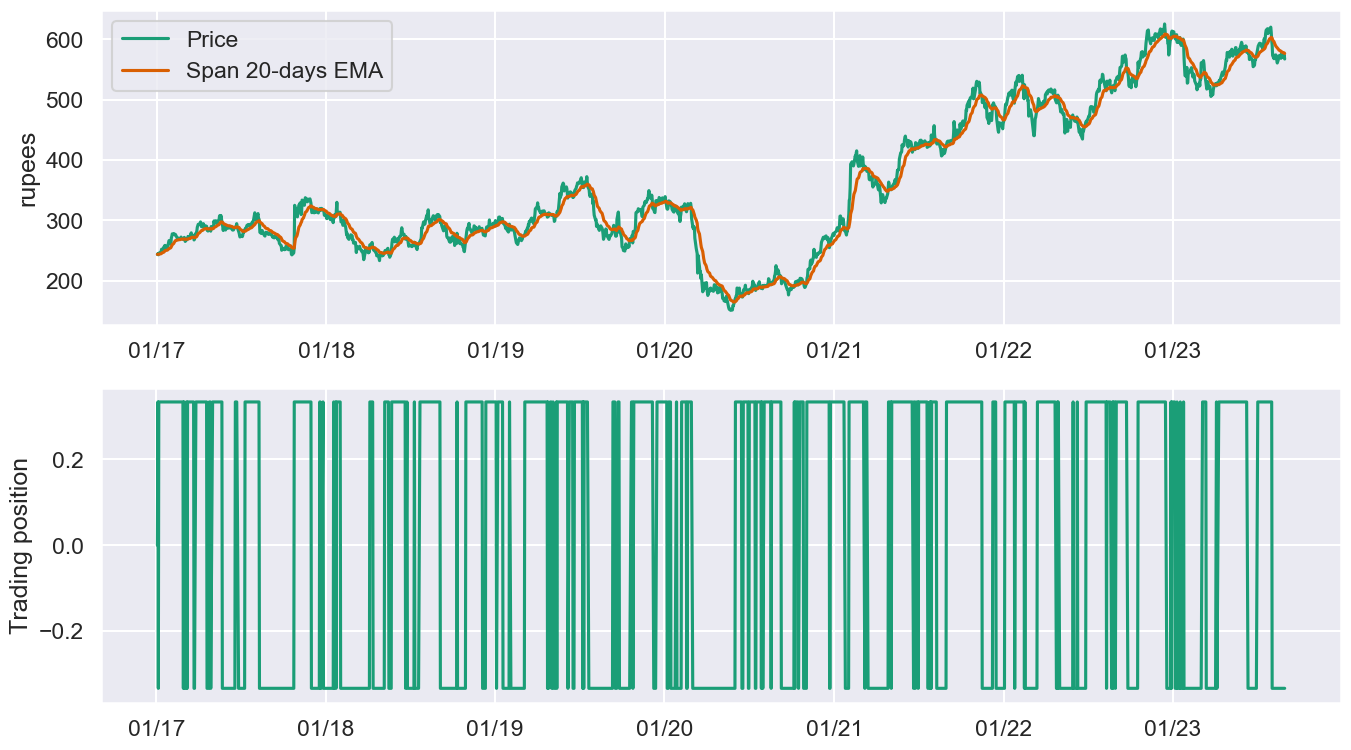

In [11]:
# plot the result 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')

ax1.set_ylabel('rupees')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)